# Neural Networks

* What is a neural network?
    * Calculation procedure
    * Training algorithm (very brief)
* Why?
* Examples

## Part 1: What is a neural network?

![](images/neuralnetwork.png)

## Classification using a neural network

Recap: For a linear separator, we have

$$f(\vec{x}) = \text{sign}(\vec{w} \cdot \vec{x})$$
where
$$\text{sign}(x) = \left\{
\begin{array}{ll}
-1 &  \text{ if } x < 0 \\
1  &  \text{ otherwise}
\end{array}\right.$$

Instead of using the $\text{sign}(\cdot)$ function, we can use a **sigmoid function** to output a probability.

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

Note that $\sigma : \mathbb{R} \to (0, 1)$; its domain is the set of all real numbers.

![](images/sigmoid.png)

The intuition is that the inputs to the $i$th neuron is simply

$$f(\vec{x}) = \sigma(a)$$

where $a = \vec{w_i}\cdot \vec{x} \in \mathbb{R}$. $a$ is known as the **activation**. Each $i$th neuron (in the hidden and output layer) contains a different $\vec{w_i}$, which it has to learn. Using this activation, the neuron squashes it using the sigmoid function.

## The training algorithm

You guessed it: **stochastic gradient descent**. With a twist...

* It's not very trivial how each $w_i$ in each of the neurons gets updated
* First attempts on doing derivatives were not very good; algorithm was very slow
* Bothered researchers for years, until the [backpropagation algorithm](https://en.wikipedia.org/wiki/Backpropagation)

## References

* [Deep Learning by Michael Nielsen](http://neuralnetworksanddeeplearning.com/index.html). (Highly recommended, doesn't require intensive math.) 
    * I used this as my first introduction to neural networks
    * By the end of the tutorial, you should be able to write your NN in Python

## Part 2: Why

**Answer**: Because we (now) can do it

## History:

* Misconceptions:
    * "Neural networks" The one model to rule them all
    * "Recently discovered"
* Actual history (paraphrased from [Wikipedia](https://en.wikipedia.org/wiki/Artificial_neural_network))
    * They're been around since 1943
    * Backpropagation algorithm since 1975 by Paul Werbos, Hinton, and others
    * Fell out of favor until the mid 2000s because of hardware limitations
    * Now they're the fervor of machine learning: "deep learning"

## Theoretical results: The universal approximation algorithm

* States that a 3 layered neural network can approximate any continuous function
* In practice, not very helpful to use, just a nice factoid

## Part 3: Example using scikit-learn

Implementation is the "multi-layered perceptron" in the **0.18 development branch**. It hasn't been released as an official build yet.

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

mnist = fetch_mldata("MNIST original")
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    algorithm='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.31951021
Iteration 2, loss = 0.15102797
Iteration 3, loss = 0.11172119
Iteration 4, loss = 0.09282186
Iteration 5, loss = 0.07973827
Iteration 6, loss = 0.07093007
Iteration 7, loss = 0.06176809
Iteration 8, loss = 0.05658643
Iteration 9, loss = 0.05023765
Iteration 10, loss = 0.04612392
Training set score: 0.987267
Test set score: 0.971800


In [5]:
# Way to change sizes of plots
# http://stackoverflow.com/a/332311/2014591
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

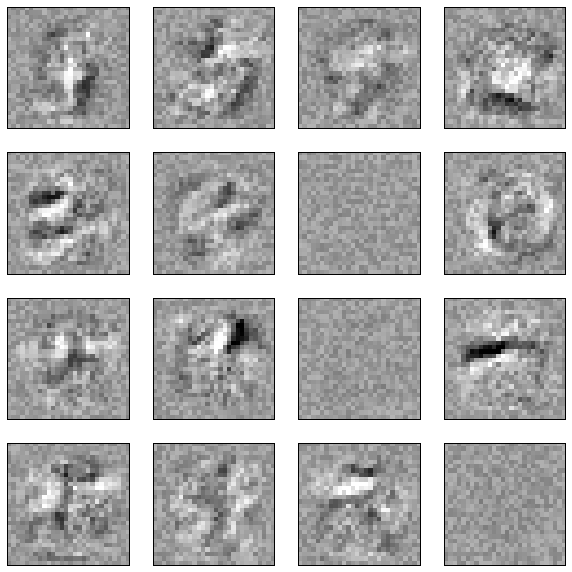

In [6]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
# matshow creates a heatmap:
# http://matplotlib.org/api/pyplot_api.html#matplaotlib.pyplot.matshow

vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()